### Introduction

In the current mobile-first world, Google Play Store hosts millions of apps across various categories, serving diverse needs of users worldwide. Analyzing this dataset provides insights into app popularity, user preferences, pricing models, and potential areas for improvement for app developers and businesses. This project will use Python's data analysis libraries to explore and visualize various aspects of apps on the Google Play Store, offering insights that could guide developers, marketers, and stakeholders to make data-driven decisions.

### Proposal

The primary objective of this analysis is to understand trends and characteristics of apps in the Google Play Store. This includes studying app ratings, user reviews, install counts, pricing models, and how these factors vary across different app categories. Additionally, we aim to identify high-performing apps, analyze free vs. paid apps, and understand user engagement through reviews and installs. Specifically, we’ll address questions like the average rating of apps, top categories by popularity, and the apps with the highest installs and reviews. Visualizations will also be provided to help interpret trends and patterns in the dataset.

### Dataset Overview

The Google Play Store dataset contains 13 columns and 10,841 rows, with the following key columns:

- **App**: Name of the application
- **Category**: Category under which the app is listed
- **Rating**: Average user rating for the app (on a scale from 1 to 5)
- **Reviews**: Number of user reviews
- **Size**: Size of the app
- **Installs**: Number of times the app has been installed
- **Type**: Free or Paid
- **Price**: Price of the app (if any)
- **Content Rating**: Age group suitable for the app
- **Genres**: Genre categories of the app
- **Last Updated**: Date when the app was last updated
- **Current Ver**: Current version of the app
- **Android Ver**: Minimum Android version required to run the app

Several columns, such as `Rating`, `Installs`, `Reviews`, `Type`, and `Price`, will be of special interest for quantitative analysis, while other columns, like `Category`, will be used for segmenting the data.

**Import Libraries & Data Load**

In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
file_path = '/content/drive/MyDrive/Data Analysis/Python Project/Google Play Store Apps Analysis/googleplaystore.csv'
df = pd.read_csv(file_path)

* Display the First 5 Rows of the Dataset

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


* Check the Last 3 Rows of the Dataset

In [9]:
# Displaying Last 3 Rows
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


* Find the Shape of the Dataset

In [10]:
# Shape of the Dataset
df.shape

(10841, 13)

* Get Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* Get Overall Statistics About the Dataframe

In [11]:
# Overall Statistics
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


* Total Number of App Titles Containing "Astrology"

In [12]:
# Apps with "Astrology" in Title
astrology_apps = df[df['App'].str.contains('Astrology', case=False, na=False)]
astrology_apps_count = len(astrology_apps)

*  Find Average App Rating

In [17]:
# Average Rating
average_rating = df['Rating'].mean()
print(average_rating)

4.193338315362443


* Find Total Number of Unique Categories

In [18]:
# Unique Categories
unique_categories = df['Category'].nunique()
print(unique_categories)

34


* Which Category Has the Highest Average Rating?

In [19]:
# Category with Highest Average Rating
highest_avg_rating_category = df.groupby('Category')['Rating'].mean().idxmax()
highest_avg_rating = df.groupby('Category')['Rating'].mean().max()
print(highest_avg_rating_category)
print(highest_avg_rating)

1.9
19.0


* Total Number of Apps Having 5-Star Rating

In [21]:
# Total Apps with 5-Star Rating
five_star_apps = len(df[df['Rating'] == 5])
print(five_star_apps)

274


* Find the Average Value of Reviews

In [23]:
# Convert Reviews to Numeric Type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
average_reviews = df['Reviews'].mean()
print(average_reviews)

444152.89603321033


* Find Total Number of Free and Paid Apps

In [24]:
# Total Number of Free and Paid Apps
free_paid_counts = df['Type'].value_counts()
print(free_paid_counts)

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64


* Find Total Number of Free and Paid Apps

In [25]:
# Total Number of Free and Paid Apps
free_paid_counts = df['Type'].value_counts()
print(free_paid_counts)

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64


*  Which App Has the Maximum Reviews?

In [26]:
# App with Maximum Reviews
max_reviews_app = df.loc[df['Reviews'].idxmax()]['App']
max_reviews_count = df['Reviews'].max()
print(max_reviews_app)
print(max_reviews_count)

Facebook
78158306.0


* Display the Top 5 Apps with the Highest Reviews

In [27]:
# Top 5 Apps with Highest Reviews
top_5_reviews = df.nlargest(5, 'Reviews')[['App', 'Reviews']]
print(top_5_reviews)

                     App     Reviews
2544            Facebook  78158306.0
3943            Facebook  78128208.0
336   WhatsApp Messenger  69119316.0
381   WhatsApp Messenger  69119316.0
3904  WhatsApp Messenger  69109672.0


* Find Average Rating of Free and Paid Apps

In [28]:
# Average Rating for Free and Paid Apps
free_paid_avg_rating = df.groupby('Type')['Rating'].mean()
print(free_paid_avg_rating)

Type
0       19.000000
Free     4.186203
Paid     4.266615
Name: Rating, dtype: float64


* Display Top 5 Apps with Maximum Installs

In [31]:
# Remove non-numeric values in 'Installs' column (e.g., 'Free')
df = df[df['Installs'] != 'Free']

# Convert 'Installs' to numeric by removing commas and '+' signs
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Now, get the top 5 apps with maximum installs
top_5_installs = df.nlargest(5, 'Installs')[['App', 'Installs']]
top_5_installs

<ipython-input-31-b6c79cf7dfc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)


,App,Installs
152,Google Play Books,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
336,WhatsApp Messenger,1.000000e+09
338,Google Chrome: Fast & Secure,1.000000e+09
340,Gmail,1.000000e+09


* Distribution of App Ratings

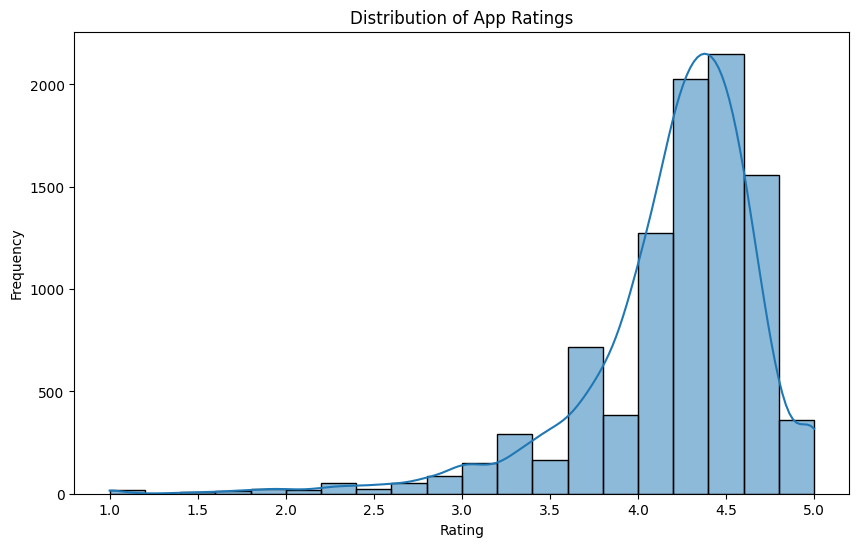

In [32]:
# Distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

* Average Rating by Category (Bar Plot)

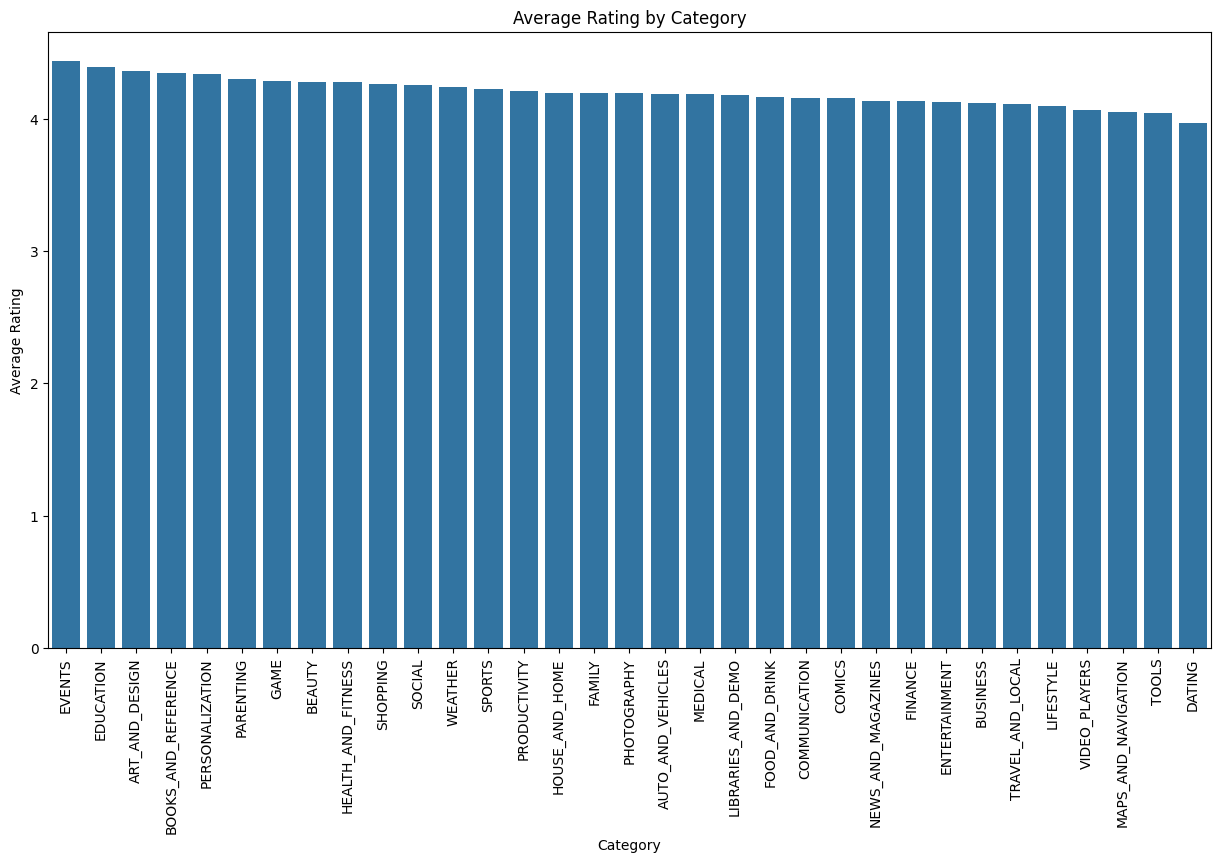

In [33]:
# Average Rating by Category
plt.figure(figsize=(15,8))
category_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_ratings.index, y=category_ratings.values)
plt.xticks(rotation=90)
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

* Total Number of Apps by Content Rating

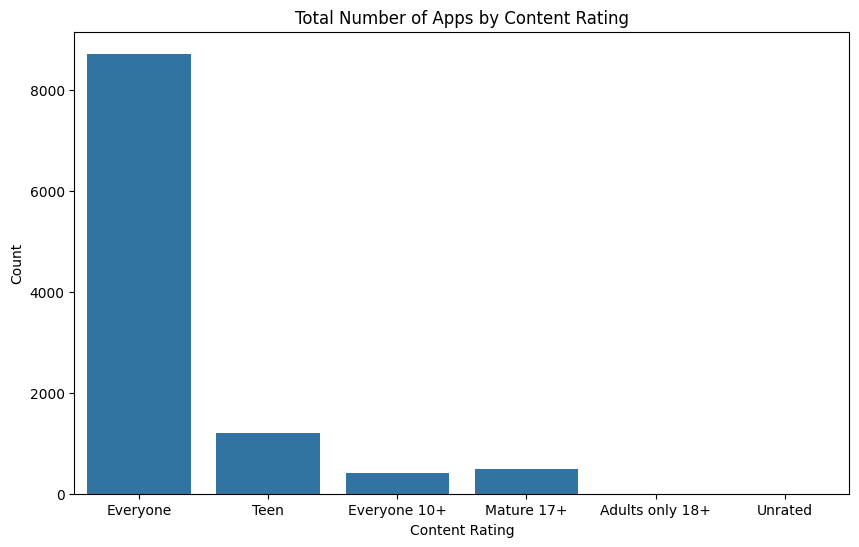

In [34]:
# Total Number of Apps by Content Rating
plt.figure(figsize=(10,6))
sns.countplot(x='Content Rating', data=df)
plt.title("Total Number of Apps by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.show()

### Conclusion

This analysis will highlight critical aspects of the Google Play Store’s app ecosystem, such as the popularity of free apps, user preferences across categories, and top-rated apps. By identifying factors correlated with high ratings and installs, this project will serve as a valuable resource for app developers and marketers. Insights gained can drive decisions around app design, category selection, and marketing strategies to increase user engagement and overall success on the platform.